In [1]:
#Import all necessary libraries we may need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
#Downloaded the data and read the data using the pd.csv function.
data = pd.read_csv('Big Mountain Resort.csv')
data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [3]:
#To start the cleaning process, we check if all of our data is in our desired format. In this case we are looking for numeric data.
#Based on the results, the numbers are on integers format, which is someting desirable for us and we made sure there is no numbers as string format.

data.dtypes

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object

In [4]:
#To analize the data, we checked the shape. We got 330 rows and 27 columns.
data.shape

(330, 27)

In [5]:
#To start the cleaning process, we used the function drop_duplicates. With this function, we want to make sure 
#there is no duplicate data that may affect our results
data = data.drop_duplicates().drop(columns = 'state')
data

,Name,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,NaN,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,9500,1000,8500,0,NaN,0,0,0,...,1.5,300.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
326,Sleeping Giant Ski Resort,Wyoming,7428,810,6619,0,0.0,0,0,0,...,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0,NaN
327,Snow King Resort,Wyoming,7808,1571,6237,0,NaN,0,0,1,...,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0,110.0
328,Snowy Range Ski & Recreation Area,Wyoming,9663,990,8798,0,0.0,0,0,0,...,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,NaN,NaN


In [6]:
#We check the new shape. 330 rows vs 26 columns
data.shape

(330, 26)

In [7]:
#Check on the missing values for each column in order to either fill the missing values, or drop if there are too many in
#the row since data would not be significant
#We can see the column with more missing values is the fasteights with an amount of 166 missing values.
#More than the half is missing values, so we need to find out. way to fill these values. 
data.isna().sum()

Name                   0
Region                 0
summit_elev            0
vertical_drop          0
base_elev              0
trams                  0
fastEight            166
fastSixes              0
fastQuads              0
quad                   0
triple                 0
double                 0
surface                0
total_chairs           0
Runs                   4
TerrainParks          51
LongestRun_mi          5
SkiableTerrain_ac      3
Snow Making_ac        46
daysOpenLastYear      51
yearsOpen              1
averageSnowfall       14
AdultWeekday          54
AdultWeekend          51
projectedDaysOpen     47
NightSkiing_ac       143
dtype: int64

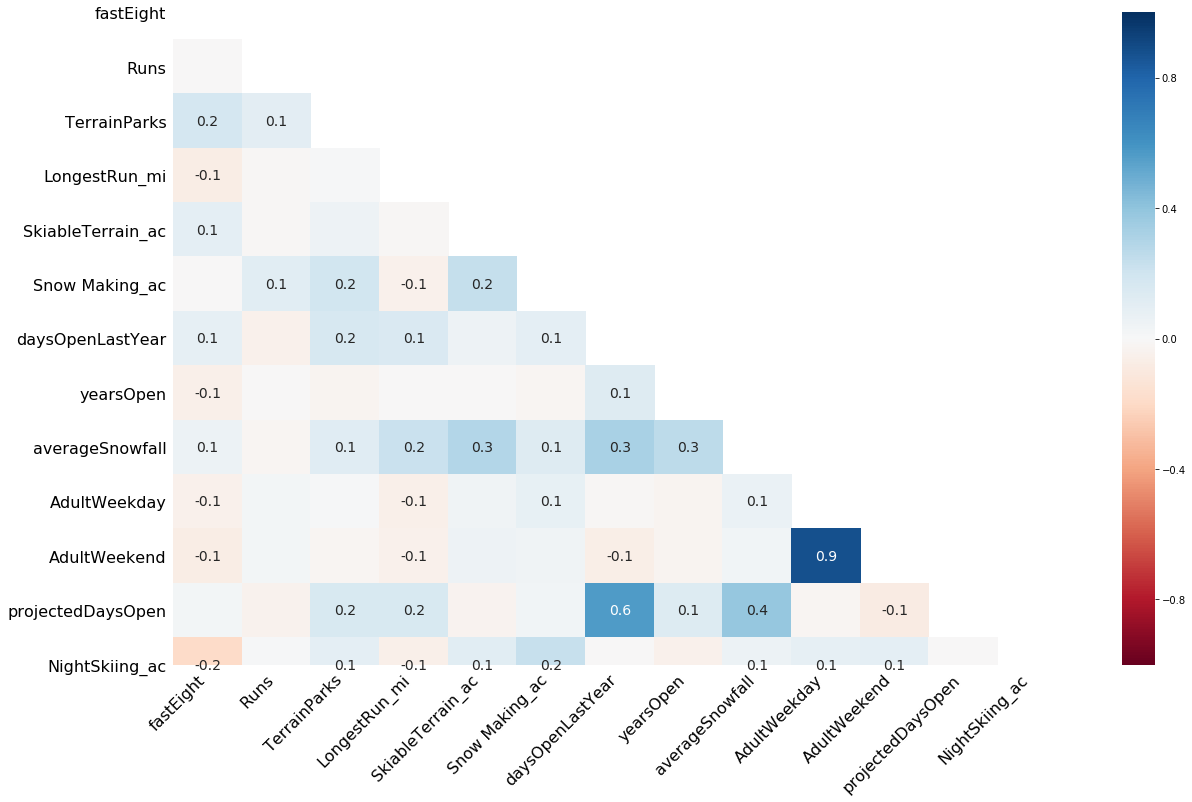

In [8]:
#Using the missingno package, we want to see any correlation between the columns and the missing values each column got
#According to the heatmap. it doesn't look correlations between columns and the missing values.
msno.heatmap(data)

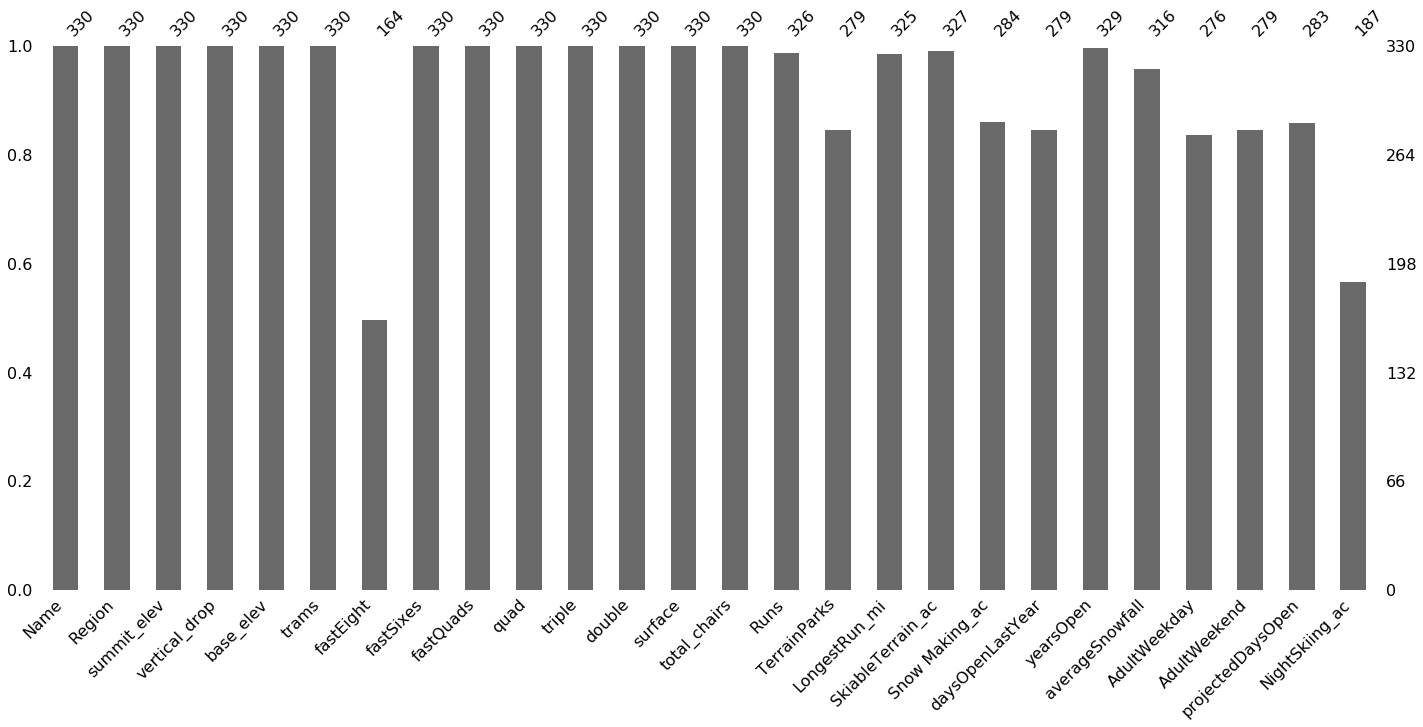

In [9]:
#Proceeded with plot a bar chart to see the order of missing values. We can see fasteight, daysOpenLast Year, Snow Making
#ac are the columns with more missing values.
msno.bar(data)


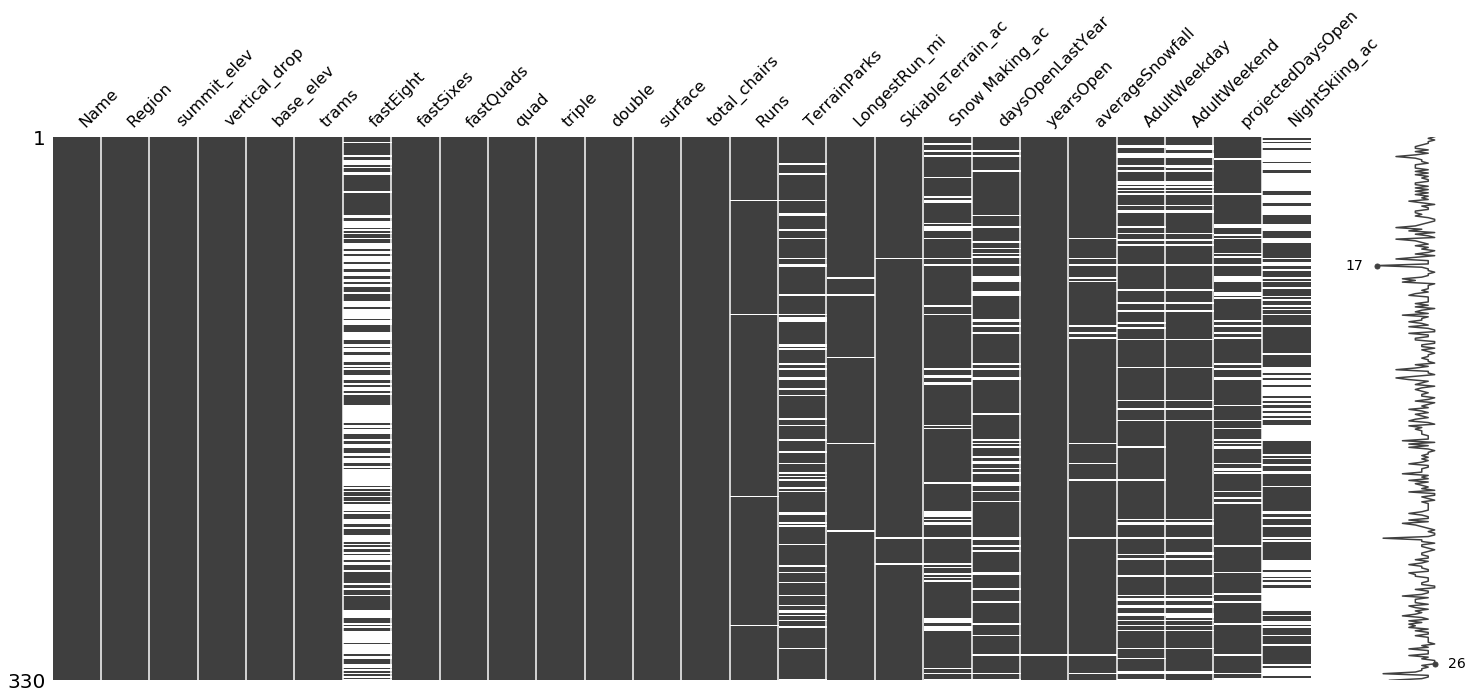

In [10]:
msno.matrix(data)

In [11]:
#Make a graphic for each column with NaN values to see the best way to fill
col_na = data.columns[data.isnull().any()]
print(col_na)

Index(['fastEight', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')


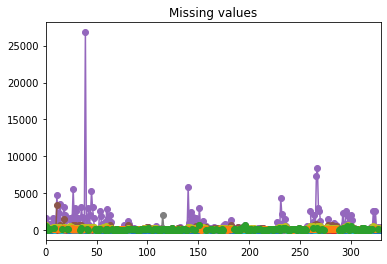

In [12]:
#Visualize the data to know how to fill the missing values
#Based on the results, it may be a good idea to use the interpolation method
for col in col_na:
    data[col].plot(title = 'Missing values', marker = 'o')

In [13]:
new_data = data.interpolate()
new_data


,Name,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.000000
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,290.000000
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.000000
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,55.000000
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,9500,1000,8500,0,0.0,0,0,0,...,1.5,300.0,106.5,95.5,9.0,384.5,44.0,44.0,105.0,118.333333
326,Sleeping Giant Ski Resort,Wyoming,7428,810,6619,0,0.0,0,0,0,...,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0,114.166667
327,Snow King Resort,Wyoming,7808,1571,6237,0,0.0,0,0,1,...,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0,110.000000
328,Snowy Range Ski & Recreation Area,Wyoming,9663,990,8798,0,0.0,0,0,0,...,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,123.0,110.000000


In [14]:
new_data.isna().sum()

Name                 0
Region               0
summit_elev          0
vertical_drop        0
base_elev            0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
dtype: int64

In [15]:
#See all the columns on the data frame
df_columns = new_data.columns
print(df_columns)

Index(['Name', 'Region', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')


In [16]:
#See al the regions
region_names = []
for i in new_data['Region']:
    region_names.append(i)

In [17]:
#Want to remove the duplicates to see how many states in total are presented in the data frame
final_list = [] 
for i in region_names: 
    if i not in final_list: 
        final_list.append(i)
print(final_list)        


['Alaska', 'Arizona', 'Northern California', 'Sierra Nevada', 'Colorado', 'Connecticut', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Mt. Hood', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Tennessee', 'Salt Lake City', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [23]:
#We want to see if there are unique values in our data frame to be considered. Also we are looking for outliers.
#As we can see, there are many unique values. There would not be considered outliers in the data presented.
for col in df_columns:
    values = new_data[col].unique()
    print(col)
    print(values)

Name
['Alyeska Resort' 'Eaglecrest Ski Area' 'Hilltop Ski Area'
 'Arizona Snowbowl' 'Sunrise Park Resort' 'Yosemite Ski & Snowboard Area'
 'Bear Mountain' 'Bear Valley' 'Boreal Mountain Resort' 'Dodge Ridge'
 'Donner Ski Ranch' 'Heavenly Mountain Resort' 'June Mountain' 'Kirkwood'
 'Mammoth Mountain Ski Area' 'Mt. Shasta Ski Park' 'Mountain High'
 'Mt. Baldy' 'Northstar California' 'Sierra-at-Tahoe' 'Ski China Peak'
 'Snow Summit' 'Snow Valley' 'Soda Springs' 'Sugar Bowl Resort'
 'Tahoe Donner' 'Arapahoe Basin Ski Area' 'Aspen / Snowmass'
 'Beaver Creek' 'Breckenridge' 'Copper Mountain Resort'
 'Crested Butte Mountain Resort' 'Purgatory' 'Eldora Mountain Resort'
 'Howelsen Hill' 'Keystone' 'Loveland' 'Monarch Mountain' 'Powderhorn'
 'Silverton Mountain' 'Cooper' 'Ski Granby Ranch' 'Steamboat'
 'Sunlight Mountain Resort' 'Telluride' 'Vail' 'Winter Park Resort'
 'Wolf Creek Ski Area' 'Mohawk Mountain' 'Mount Southington Ski Area'
 'Powder Ridge Park' 'Ski Sundown' 'Woodbury Ski Area' 'Bo

In [28]:
#Printed the final data frame without NaN values, duplicates and repeated columns.
pd.set_option("max_rows", None)
new_data

,Name,Region,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1.00,1610.0,113.000000,150.000000,60.0,669.0,65.000000,85.000000,150.000000,550.000000
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,2.00,640.0,60.000000,45.000000,44.0,350.0,47.000000,53.000000,90.000000,290.000000
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,1.00,30.0,30.000000,150.000000,36.0,69.0,30.000000,34.000000,152.000000,30.000000
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,2.00,777.0,104.000000,122.000000,81.0,260.0,89.000000,89.000000,122.000000,55.000000
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,1.20,800.0,80.000000,115.000000,49.0,250.0,74.000000,78.000000,104.000000,80.000000
5,Yosemite Ski & Snowboard Area,Northern California,7800,600,7200,0,0.0,0,0,0,...,0.40,88.0,139.000000,110.000000,84.0,300.0,47.000000,47.000000,107.000000,110.000000
6,Bear Mountain,Sierra Nevada,8805,1665,7140,0,0.0,0,2,1,...,1.50,198.0,198.000000,122.000000,76.0,100.0,47.666667,54.750000,130.000000,140.000000
7,Bear Valley,Sierra Nevada,8500,1900,6600,0,0.0,1,1,0,...,1.20,1680.0,100.000000,165.000000,52.0,359.0,48.333333,62.500000,151.000000,170.000000
8,Boreal Mountain Resort,Sierra Nevada,7700,500,7200,0,0.0,0,1,1,...,1.00,380.0,200.000000,150.000000,54.0,400.0,49.000000,70.250000,150.000000,200.000000
9,Dodge Ridge,Sierra Nevada,8200,1600,6600,0,0.0,0,0,1,...,2.00,862.0,130.000000,156.500000,69.0,350.0,78.000000,78.000000,140.000000,184.125000


In [29]:
#To finalize, we would divide the data frame by regions. It means, separate data frames by each state. 
#This way would be easier to interpreate the results depending on the location
for state in final_list:
    df_filter = new_data[new_data['Region'] == state]
    print(state)
    print(df_filter)


Alaska
                  Name  Region  summit_elev  vertical_drop  base_elev  trams  \
0       Alyeska Resort  Alaska         3939           2500        250      1   
1  Eaglecrest Ski Area  Alaska         2600           1540       1200      0   
2     Hilltop Ski Area  Alaska         2090            294       1796      0   

   fastEight  fastSixes  fastQuads  quad  ...  LongestRun_mi  \
0        0.0          0          2     2  ...            1.0   
1        0.0          0          0     0  ...            2.0   
2        0.0          0          0     0  ...            1.0   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0             150.0       60.0   
1              640.0            60.0              45.0       44.0   
2               30.0            30.0             150.0       36.0   

   averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0            669.0          65.0          85.0              150.0   


                                   Name     Region  summit_elev  \
124                          Afton Alps  Minnesota         1530   
125          Andes Tower Hills Ski Area  Minnesota         1620   
126                           Buck Hill  Minnesota         1225   
127                Buena Vista Ski Area  Minnesota         1510   
128  Coffee Mill Ski & Snowboard Resort  Minnesota         1150   
129    Elm Creek Winter Recreation Area  Minnesota          928   
130                 Giants Ridge Resort  Minnesota         1972   
131         Hyland Ski & Snowboard Area  Minnesota         1075   
132                    Lutsen Mountains  Minnesota         1688   
133                 Mount Kato Ski Area  Minnesota          540   
134               Powder Ridge Ski Area  Minnesota          790   
135                     Spirit Mountain  Minnesota         1320   
136                       Welch Village  Minnesota         1060   
137  Wild Mountain Ski & Snowboard Area  Minnesota         111

                         Name          Region  summit_elev  vertical_drop  \
260             Alta Ski Area  Salt Lake City        11068           2538   
263           Brighton Resort  Salt Lake City        10500           1745   
264        Deer Valley Resort  Salt Lake City         9570           3000   
266                 Park City  Salt Lake City        10000           3200   
269                  Snowbird  Salt Lake City        11000           3240   
270  Solitude Mountain Resort  Salt Lake City        10488           2494   

     base_elev  trams  fastEight  fastSixes  fastQuads  quad  ...  \
260       8530      0        0.0          0          3     0  ...   
263       8755      0        0.0          0          3     1  ...   
264       6570      1        0.0          0         13     0  ...   
266       6800      4        0.0          6         10     4  ...   
269       7760      1        0.0          0          6     0  ...   
270       7994      0        0.0          0   